In [232]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from config import *
from collections import defaultdict

In [233]:
all_results=[]
feature_importance=defaultdict(lambda: [])
dimension=5
for split_type in ["I","P"]:
    for normalize in [False,True]:
        for difference in [False,True]:
            for train_alg in ["DE","ES","PSO"]:
                for max_iteration in [0,2,4,9,19,29]:
                    if difference and max_iteration==0:
                        continue
                    file=f"AS_results/normalize_{normalize}_difference_{difference}_split_{split_type}/dim_{dimension}_DE_ES_PSO_it_0-{max_iteration}_instance_count_100_trainalg_{train_alg}_all_results.csv"
                    for fold in range(0,10):
                        if max_iteration==29:
                            fi_file=f"AS_results/normalize_{normalize}_difference_{difference}_split_{split_type}/dim_{dimension}_DE_ES_PSO_it_0-{max_iteration}_instance_count_100_trainalg_{train_alg}/fold_{fold}_model_rf_feature_importance.csv"
                            if os.path.isfile(fi_file):
                                fi_df=pd.read_csv(fi_file,index_col=0,compression='zip')
                                feature_importance[(normalize,difference)]+=[fi_df.assign(split_type=split_type, normalize=normalize, difference=difference, train_alg=train_alg, max_iteration=max_iteration,fold=fold)]
                            else:
                                print("Not found", fi_file)
                    if os.path.isfile(file):
                        df=pd.read_csv(file,index_col=0)
                        all_results+=[df.assign(split_type=split_type, normalize=normalize, difference=difference, train_alg=train_alg, max_iteration=max_iteration)]
all_results=pd.concat(all_results)
merge_columns=list(all_results.drop(columns=['model','loss']).columns)
results_diff=all_results.query('model=="rf"').merge(all_results.query('model=="dummy"'), left_on=merge_columns, right_on=merge_columns, suffixes=['_rf','_dummy'])
results_diff['model performance - baseline performance']=results_diff['loss_rf']-results_diff['loss_dummy']
results_diff['feature calculation budget'] = results_diff['max_iteration']+1

In [249]:
all_results.query('model=="dummy" and split_name=="test"')

,train_algorithm,fold,loss,model,split_name,split_type,normalize,difference,train_alg,max_iteration
3,DE,0,0.762566,dummy,test,I,False,False,DE,0
7,DE,1,0.764628,dummy,test,I,False,False,DE,0
11,DE,2,0.792852,dummy,test,I,False,False,DE,0
15,DE,3,0.772698,dummy,test,I,False,False,DE,0
19,DE,4,0.791813,dummy,test,I,False,False,DE,0
...,...,...,...,...,...,...,...,...,...,...
23,PSO,5,0.983962,dummy,test,P,True,True,PSO,29
27,PSO,6,0.897218,dummy,test,P,True,True,PSO,29
31,PSO,7,0.926614,dummy,test,P,True,True,PSO,29
35,PSO,8,0.540223,dummy,test,P,True,True,PSO,29


In [253]:
all_results.query('model=="dummy" and split_name=="test"').groupby(['train_algorithm','normalize','difference','max_iteration','split_type'])['loss'].mean()

train_algorithm  normalize  difference  max_iteration  split_type
DE               False      False       0              I             0.775777
                                                       P             0.785682
                                        2              I             0.775777
                                                       P             0.785682
                                        4              I             0.775777
                                                                       ...   
PSO              True       True        9              P             0.785682
                                        19             I             0.775777
                                                       P             0.785682
                                        29             I             0.775777
                                                       P             0.785682
Name: loss, Length: 132, dtype: float64

In [234]:
it_ela_all_results=[]
dimension=5
for split_type in ["I","P"]:
    for normalize in [False,True]:
        for difference in [False,True]:
            for train_alg in ["DE","ES","PSO"]:
                for max_iteration in [0,2,4,9,19,29]:
                    if difference and max_iteration==0:
                        continue
                    file=f"AS_results_iteration_ela/normalize_{normalize}_difference_{difference}_split_{split_type}/dim_{dimension}_DE_ES_PSO_it_0-{max_iteration}_instance_count_100_trainalg_{train_alg}_all_results.csv"

                    if os.path.isfile(file):
                        df=pd.read_csv(file,index_col=0)
                        it_ela_all_results+=[df.assign(split_type=split_type, normalize=normalize, difference=difference, train_alg=train_alg, max_iteration=max_iteration)]
it_ela_all_results=pd.concat(it_ela_all_results)
merge_columns=list(it_ela_all_results.drop(columns=['model','loss']).columns)
it_ela_results_diff=it_ela_all_results.query('model=="rf"').merge(it_ela_all_results.query('model=="dummy"'), left_on=merge_columns, right_on=merge_columns, suffixes=['_rf','_dummy'])
it_ela_results_diff['model performance - baseline performance']=it_ela_results_diff['loss_rf']-it_ela_results_diff['loss_dummy']
it_ela_results_diff['feature calculation budget'] = it_ela_results_diff['max_iteration']+1

In [254]:
it_ela_all_results.query('model=="dummy" and split_name=="test"').groupby(['train_algorithm','normalize','difference','max_iteration','split_type'])['loss'].mean()

train_algorithm  normalize  difference  max_iteration  split_type
DE               False      False       0              I             0.775777
                                                       P             0.785682
                                        2              I             0.775777
                                                       P             0.785682
                                        4              I             0.775777
                                                                       ...   
PSO              True       True        9              P             0.785682
                                        19             I             0.775777
                                                       P             0.785682
                                        29             I             0.775777
                                                       P             0.785682
Name: loss, Length: 132, dtype: float64

In [273]:
pd.read_csv("AS_results_iteration_ela/normalize_True_difference_False_split_I/dim_5_DE_ES_PSO_it_0-0_instance_count_100_trainalg_ES/fold_0_model_rf_feature_importance.csv",compression="zip").columns

Index(['Unnamed: 0', '0_ela_level.mmce_lda_10', '0_ela_level.mmce_mda_10',
       '0_ela_level.lda_mda_10', '0_ela_level.mmce_lda_25',
       '0_ela_level.mmce_qda_25', '0_ela_level.mmce_mda_25',
       '0_ela_level.lda_qda_25', '0_ela_level.lda_mda_25',
       '0_ela_level.qda_mda_25', '0_ela_level.mmce_lda_50',
       '0_ela_level.mmce_qda_50', '0_ela_level.mmce_mda_50',
       '0_ela_level.lda_qda_50', '0_ela_level.lda_mda_50',
       '0_ela_level.qda_mda_50', '0_ela_level.costs_fun_evals',
       '0_ela_level.costs_runtime', '0_ela_meta.lin_simple.adj_r2',
       '0_ela_meta.lin_simple.intercept', '0_ela_meta.lin_simple.coef.min',
       '0_ela_meta.lin_simple.coef.max',
       '0_ela_meta.lin_simple.coef.max_by_min',
       '0_ela_meta.lin_w_interact.adj_r2', '0_ela_meta.quad_simple.adj_r2',
       '0_ela_meta.quad_w_interact.adj_r2', '0_ela_meta.costs_fun_evals',
       '0_ela_meta.costs_runtime', '0_basic.dim', '0_basic.observations',
       '0_basic.lower_min', '0_basic.lower_m

In [235]:
ela_results=[]
dimension=5
for split_type in ["I","P"]:
    for normalize in [False,True]:
        for scdf in [10,30,50,100,200,300]:
            file=f"AS_results_static_ela/normalize_{normalize}_split_{split_type}/dim_{dimension}_DE_ES_PSO_{scdf}d_instance_count_100_all_results.csv"

            if os.path.isfile(file):
                df=pd.read_csv(file,index_col=0)
                df['feature calculation budget']=int(scdf/10)
                ela_results+=[df.assign(split_type=split_type, normalize=normalize)]
ela_results=pd.concat(ela_results)

ela_merge_columns=list(ela_results.drop(columns=['model','loss']).columns)
ela_results_diff=ela_results.query('model=="rf"').merge(ela_results.query('model=="dummy"'), left_on=ela_merge_columns, right_on=ela_merge_columns, suffixes=['_rf','_dummy'])
ela_results_diff['model performance - baseline performance']=ela_results_diff['loss_rf']-ela_results_diff['loss_dummy']

In [256]:
ela_results

,fold,loss,model,split_name,feature calculation budget,split_type,normalize
0,0,0.995481,rf,train,1,I,False
1,0,0.973328,rf,test,1,I,False
2,0,0.777244,dummy,train,1,I,False
3,0,0.762566,dummy,test,1,I,False
4,1,0.994852,rf,train,1,I,False
...,...,...,...,...,...,...,...
35,8,0.540223,dummy,test,30,P,True
36,9,0.996833,rf,train,30,P,True
37,9,0.678725,rf,test,30,P,True
38,9,0.778338,dummy,train,30,P,True


In [270]:
ela_results.query('model=="dummy" and split_name=="test"').groupby(['normalize', 'feature calculation budget','split_type'])['loss'].median()

normalize  feature calculation budget  split_type
False      1                           I             0.773860
                                       P             0.851597
           3                           I             0.774329
                                       P             0.852107
           5                           I             0.774329
                                       P             0.852107
           10                          I             0.774329
                                       P             0.852107
           20                          I             0.774329
                                       P             0.852107
           30                          I             0.774329
                                       P             0.852107
True       1                           I             0.774329
                                       P             0.852107
           3                           I             0.774329
                    

In [236]:
ela_results_diff

,fold,loss_rf,model_rf,split_name,feature calculation budget,split_type,normalize,loss_dummy,model_dummy,model performance - baseline performance
0,0,0.995481,rf,train,1,I,False,0.777244,dummy,0.218237
1,0,0.973328,rf,test,1,I,False,0.762566,dummy,0.210762
2,1,0.994852,rf,train,1,I,False,0.777015,dummy,0.217837
3,1,0.972011,rf,test,1,I,False,0.764628,dummy,0.207382
4,2,0.995229,rf,train,1,I,False,0.773879,dummy,0.221350
...,...,...,...,...,...,...,...,...,...,...
475,7,0.633295,rf,test,30,P,True,0.926614,dummy,-0.293319
476,8,0.996545,rf,train,30,P,True,0.797191,dummy,0.199355
477,8,0.819666,rf,test,30,P,True,0.540223,dummy,0.279443
478,9,0.996833,rf,train,30,P,True,0.778338,dummy,0.218495


In [237]:
m=pd.concat([results_diff.assign(features="DynamoRep"), it_ela_results_diff.assign(features="Iteration ELA")])

,train_algorithm,fold,loss_rf,model_rf,split_name,split_type,normalize,difference,train_alg,max_iteration,loss_dummy,model_dummy,model performance \n- baseline performance,feature calculation budget,features,algorithm - features
0,DE,0,0.994289,rf,train,I,False,False,DE,0.0,0.777244,dummy,0.217044,1,DynamoRep,DE DynamoRep
1,DE,0,0.916001,rf,test,I,False,False,DE,0.0,0.762566,dummy,0.153435,1,DynamoRep,DE DynamoRep
2,DE,1,0.994219,rf,train,I,False,False,DE,0.0,0.777015,dummy,0.217204,1,DynamoRep,DE DynamoRep
3,DE,1,0.929315,rf,test,I,False,False,DE,0.0,0.764628,dummy,0.164687,1,DynamoRep,DE DynamoRep
4,DE,2,0.994355,rf,train,I,False,False,DE,0.0,0.773879,dummy,0.220475,1,DynamoRep,DE DynamoRep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,NaN,7,0.633295,rf,test,P,True,False,NaN,NaN,0.926614,dummy,-0.293319,30,NaN,Static ELA
476,NaN,8,0.996545,rf,train,P,True,False,NaN,NaN,0.797191,dummy,0.199355,30,NaN,Static ELA
477,NaN,8,0.819666,rf,test,P,True,False,NaN,NaN,0.540223,dummy,0.279443,30,NaN,Static ELA
478,NaN,9,0.996833,rf,train,P,True,False,NaN,NaN,0.778338,dummy,0.218495,30,NaN,Static ELA


In [238]:
ela_results_diff.groupby(['split_type'])['model loss - baseline loss'].mean()

KeyError: 'Column not found: model loss - baseline loss'

In [239]:
m['algorithm - features']=m.apply(lambda x: x['train_alg'] + ' ' + x['features'], axis=1)

In [240]:
ela_results_diff['algorithm - features']='Static ELA'
m=pd.concat([m, ela_results_diff.assign(difference=False,)])


In [242]:
m=m.rename(columns={'model performance - baseline performance':'model performance \n- baseline performance'})

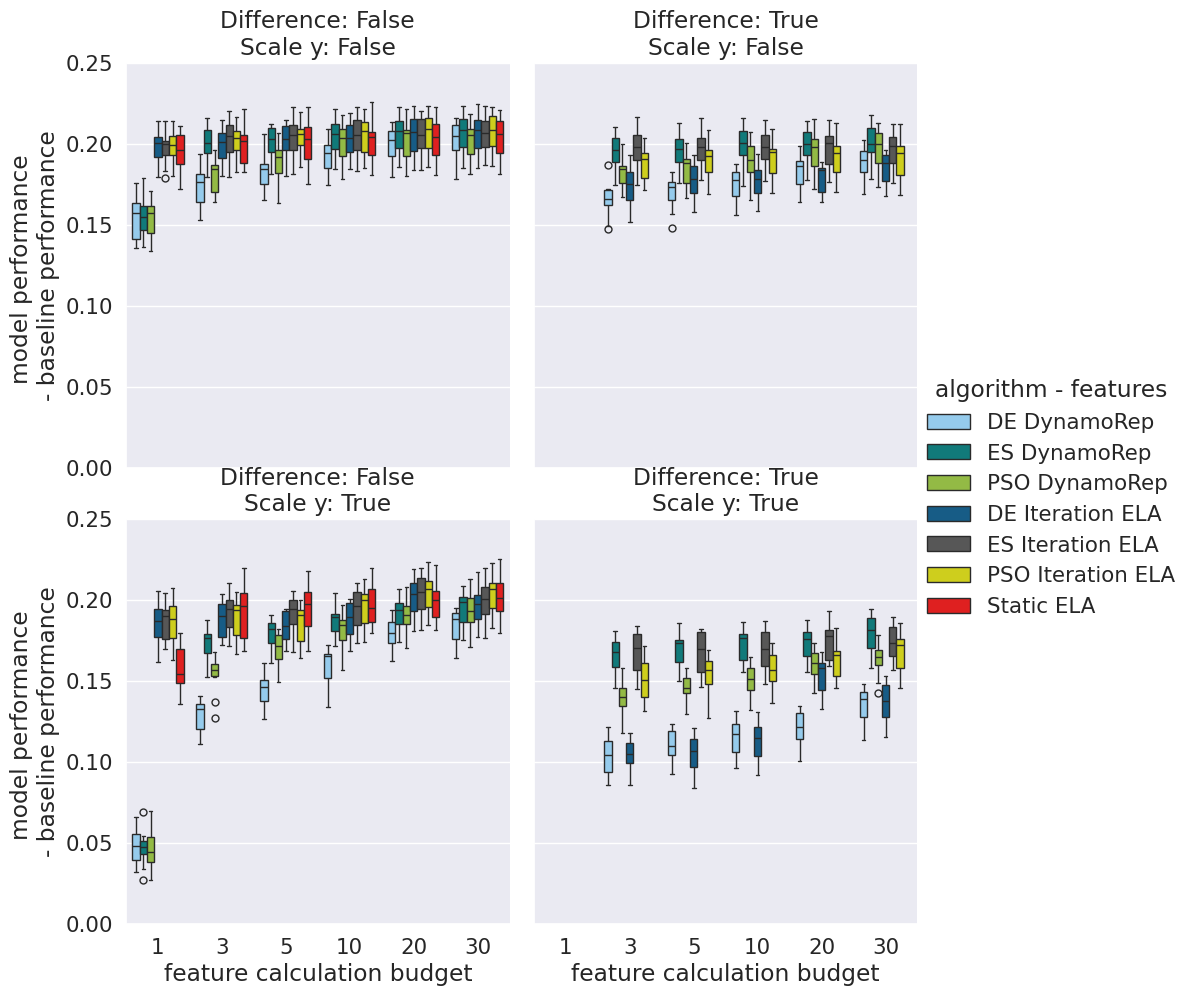

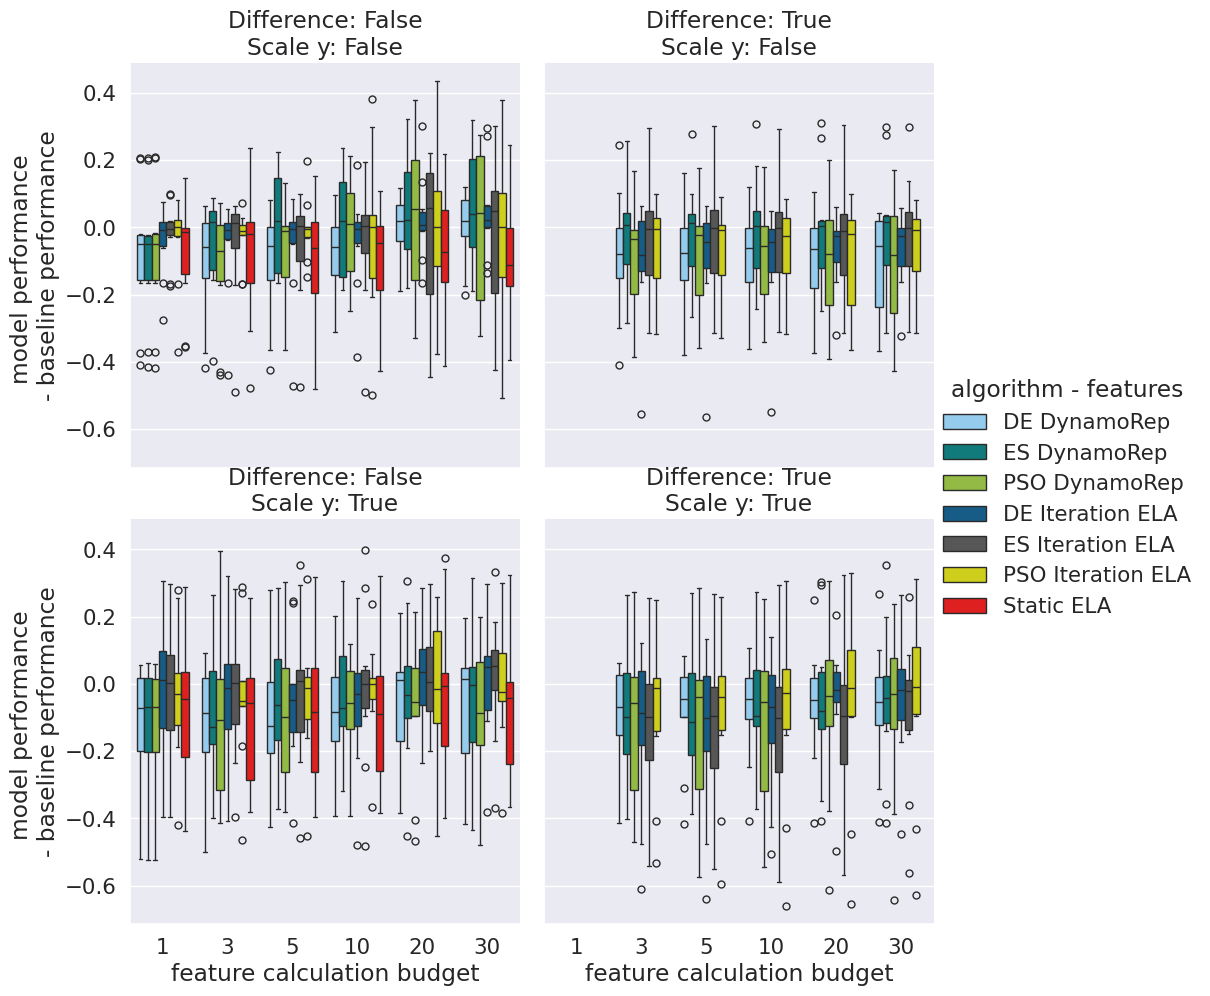

In [243]:
sns.set(font_scale=1.4)
for split_type in ['I','P']:
    mm=m.query('split_name=="test" and split_type==@split_type').rename(columns={'normalize':'Scale y','difference':'Difference'})
    g=sns.catplot( mm, x='feature calculation budget', row='Scale y', y='model performance \n- baseline performance', col='Difference', kind='box', hue='algorithm - features', palette=color_palette[:5] + ['#ebeb00','red'])
    g.set_titles("Difference: {col_name}\nScale y: {row_name}")
    if split_type=="I":
        g.set(ylim=(0, 0.25))
    plt.savefig(f'AS_visualizations/{split_type}_results.pdf')
sns.set(font_scale=1)

['std_it_0_y', 'std_it_29_y', 'std_it_29_x_4', 'std_it_5_x_4', 'std_it_28_y', 'std_it_1_y', 'std_it_7_x_4', 'std_it_29_x_2', 'std_it_6_x_4', 'std_it_29_x_0', 'std_it_28_x_4', 'std_it_27_y', 'std_it_6_y', 'mean_it_0_y', 'std_it_23_y', 'max_it_0_y', 'std_it_2_y', 'std_it_3_y', 'std_it_18_y', 'std_it_4_y']
     split_type  normalize  difference train_alg  max_iteration  fold  \
0             I      False       False        DE             29     0   
1             I      False       False        DE             29     1   
2             I      False       False        DE             29     2   
3             I      False       False        DE             29     3   
4             I      False       False        DE             29     4   
...         ...        ...         ...       ...            ...   ...   
1195          P      False       False       PSO             29     5   
1196          P      False       False       PSO             29     6   
1197          P      False       False

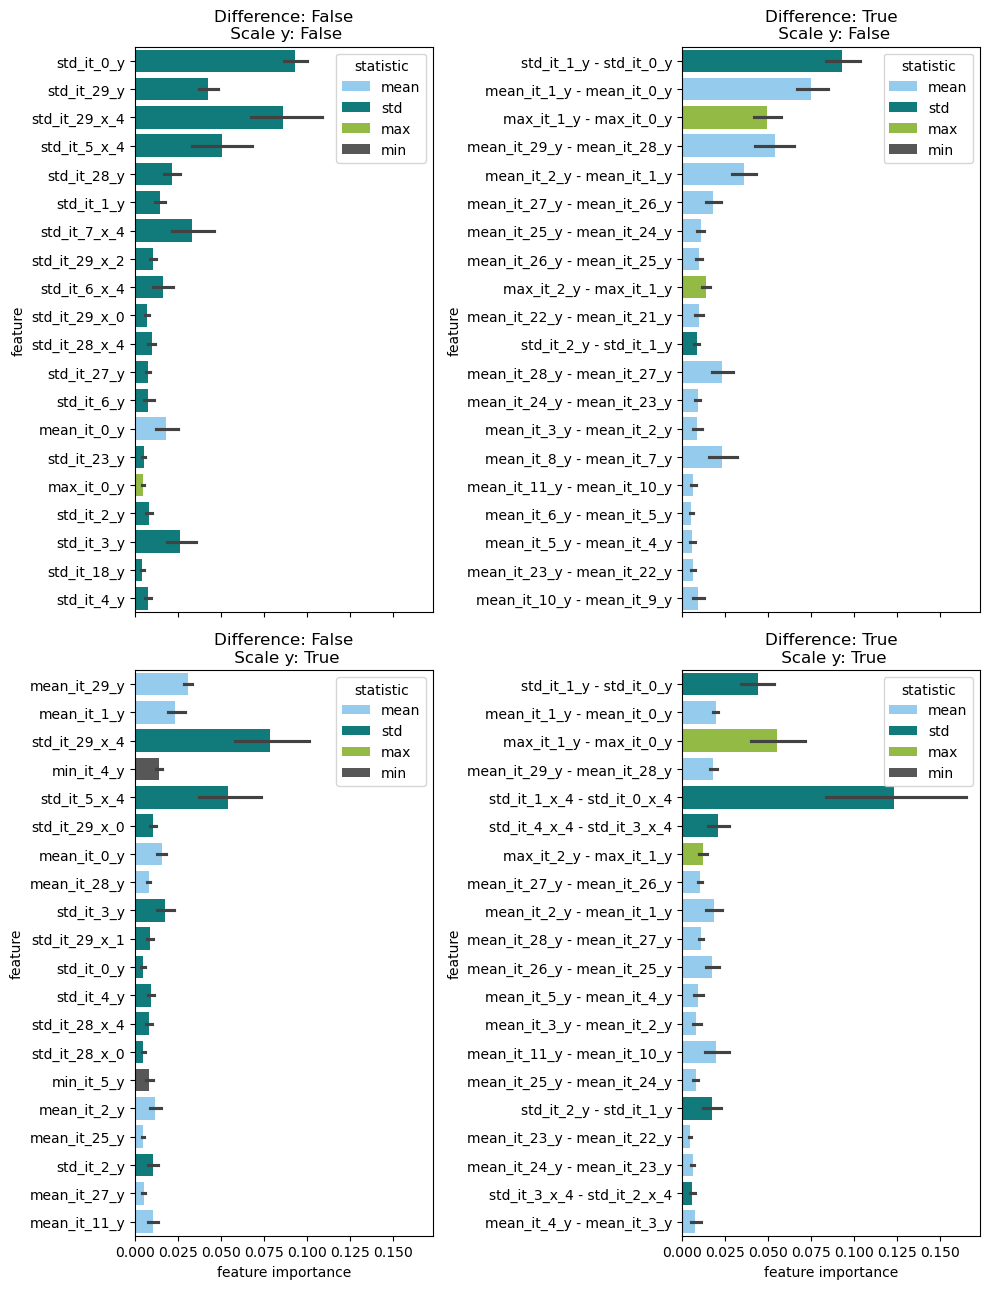

In [176]:
fig, axes = plt.subplots(2,2, figsize=(10,13), sharex=True)
id_vars=['split_type', 'normalize', 'difference', 'train_alg', 'max_iteration', 'fold']
for normalize_index, normalize in enumerate([False, True]):
    for difference_index, difference in enumerate([False,True]):
        ax=axes[normalize_index, difference_index]
        ax.set_title(f'Difference: {difference}\n Scale y: {normalize}')
        fi=pd.concat(feature_importance[normalize,difference])
        fi.columns=[c.replace('dim_5','y') if 'dim_5' in c else c.replace('_dim_','_x_') for c in fi.columns]
        top_features=list(fi.drop(columns=id_vars).median().sort_values(ascending=False).head(20).index)
        
        all_feature_importances_df_melted=pd.melt(fi[top_features+id_vars], id_vars=id_vars, value_vars=top_features)
        all_feature_importances_df_melted['statistic']=all_feature_importances_df_melted['variable'].apply(lambda x: x.split('_')[0])
        print(top_features)
        print(all_feature_importances_df_melted)
        sns.barplot(all_feature_importances_df_melted, y='variable',x='value',hue='statistic',palette=[light_blue,dark_cyan,lime, grey], ax=ax,dodge=False, hue_order=['mean','std','max','min'])
        ax.set_xlabel('feature importance')
        ax.set_ylabel('feature')
plt.tight_layout()
plt.show()

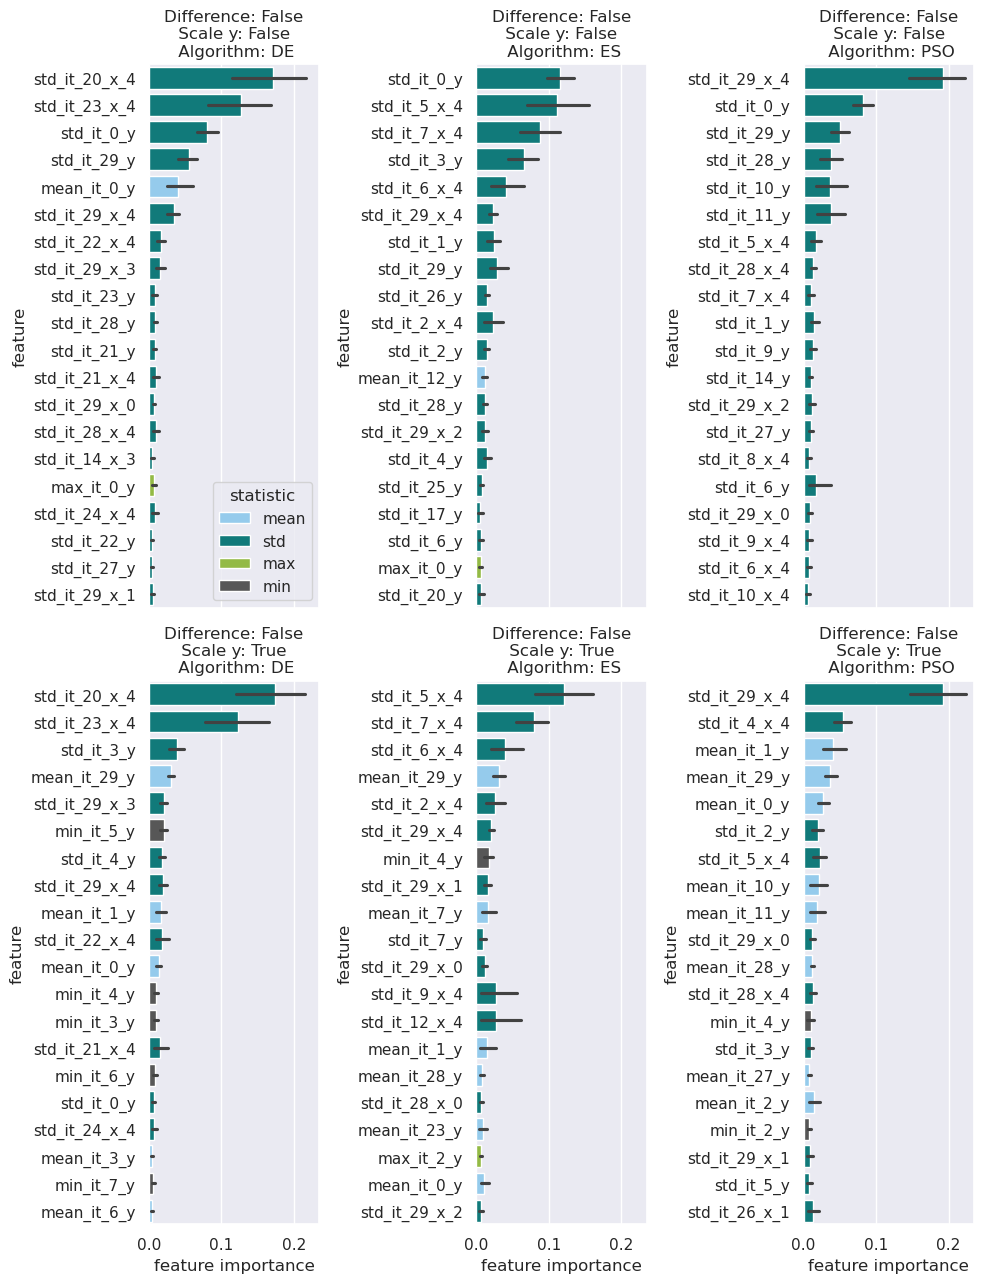

In [231]:
fig, axes = plt.subplots(2,3, figsize=(10,13), sharex=True)
id_vars=['split_type', 'normalize', 'difference', 'train_alg', 'max_iteration', 'fold']
for normalize_index, normalize in enumerate([False, True]):
    for alg_index, algorithm in enumerate(['DE','ES','PSO']):
        ax=axes[normalize_index, alg_index]
        ax.set_title(f'Difference: {False}\n Scale y: {normalize} \n Algorithm: {algorithm}')
        fi=pd.concat(feature_importance[normalize,False]).query('train_alg==@algorithm and split_type=="P"')
        fi.columns=[c.replace('dim_5','y') if 'dim_5' in c else c.replace('_dim_','_x_') for c in fi.columns]
        top_features=list(fi.drop(columns=id_vars).median().sort_values(ascending=False).head(20).index)
        
        all_feature_importances_df_melted=pd.melt(fi[top_features+id_vars], id_vars=id_vars, value_vars=top_features)
        all_feature_importances_df_melted['statistic']=all_feature_importances_df_melted['variable'].apply(lambda x: x.split('_')[0])
        sns.barplot(all_feature_importances_df_melted, y='variable',x='value',hue='statistic',palette=[light_blue,dark_cyan,lime, grey], ax=ax,dodge=False, hue_order=['mean','std','max','min'])
        ax.set_xlabel('feature importance')
        ax.set_ylabel('feature')
        if normalize_index>0 or alg_index>0:
            ax.legend_.remove()
plt.tight_layout()
plt.savefig('AS_visualizations/feature_importance_per_algorithm_P_split.pdf')
plt.show()